In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import silhouette_score

In [2]:
data = pd.read_csv('Final_Dataset.csv')

In [3]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [4]:
min_scale = MinMaxScaler()
data_min_scaled = min_scale.fit_transform(data)

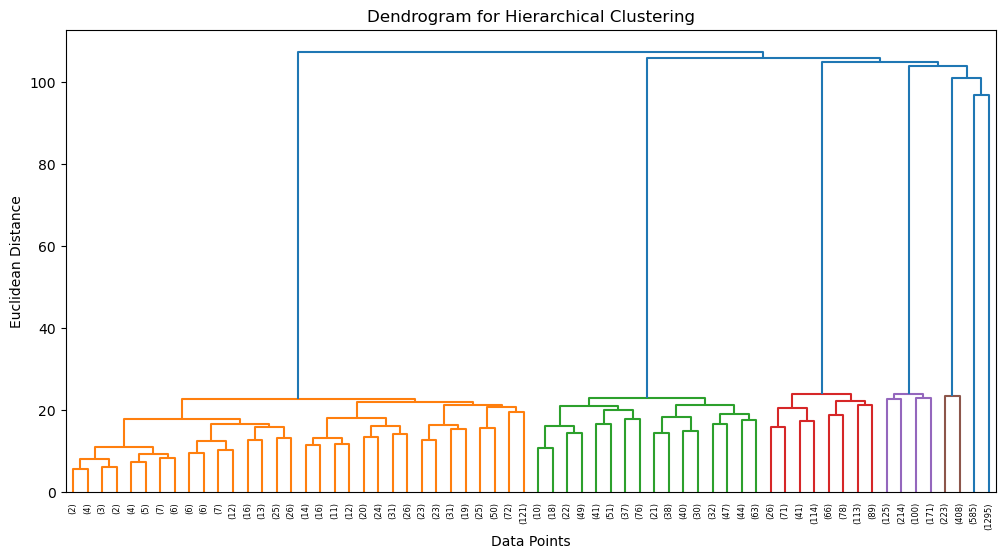

In [5]:
data_scaled_df = pd.DataFrame(data_scaled)

sampled_data = data_scaled_df.sample(n=5000, random_state=42).values

plt.figure(figsize=(12, 6))
dendrogram = sch.dendrogram(
    sch.linkage(sampled_data, method='ward'),
    truncate_mode='level',
    p=5 
)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()


In [6]:
hc = AgglomerativeClustering(n_clusters=4, linkage='ward')
labels = hc.fit_predict(data)
silhouette = silhouette_score(data, labels)
print(f"Silhouette Score: {silhouette:.4f}")

Silhouette Score: 0.4459


In [7]:
data['Cluster'] = labels

<Figure size 1200x800 with 0 Axes>

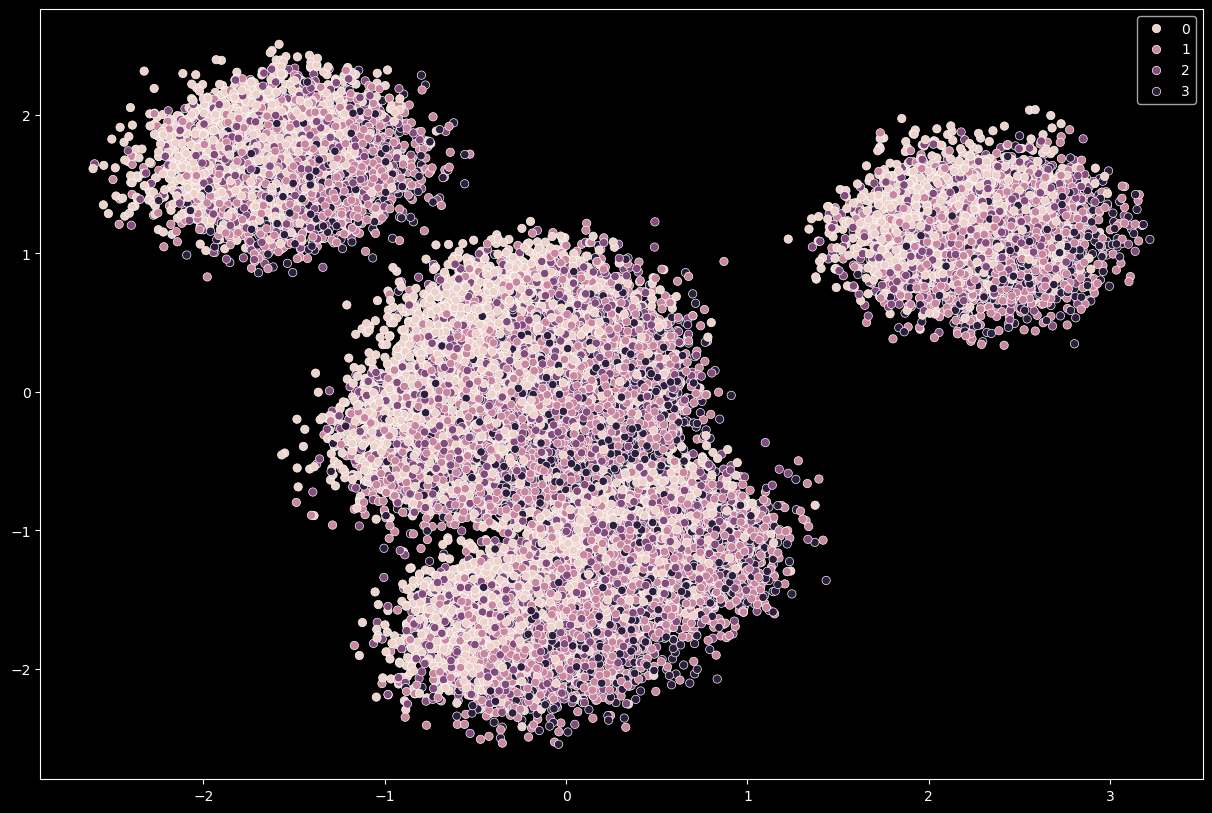

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

features = data.drop(columns=['Cluster'])

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)

plt.style.use("dark_background")
plt.figure(figsize=(12, 8), facecolor="black")

df_pca = pd.DataFrame(pca_result, columns=["PCA1", "PCA2"])
df_pca["Cluster"] = data["Cluster"]
df_pca = np.array(df_pca)
plt.figure(figsize = (15,10))
sns.scatterplot(x =df_pca[:,0], y= df_pca[:,1], hue = labels)
plt.show()

In [23]:
df_pca = pd.DataFrame(df_pca,columns = ['PCA1','PCA2','Cluster'])
df_pca['Cluster'].value_counts()

Cluster
0.0    13317
1.0    12117
2.0     7575
3.0     5823
Name: count, dtype: int64

In [25]:
silhouette = silhouette_score(data, labels)
print(f"Silhouette Score: {silhouette:.4f}")

Silhouette Score: 0.4459
